##### first we start minikube by issuing the following command<br>
minikube start

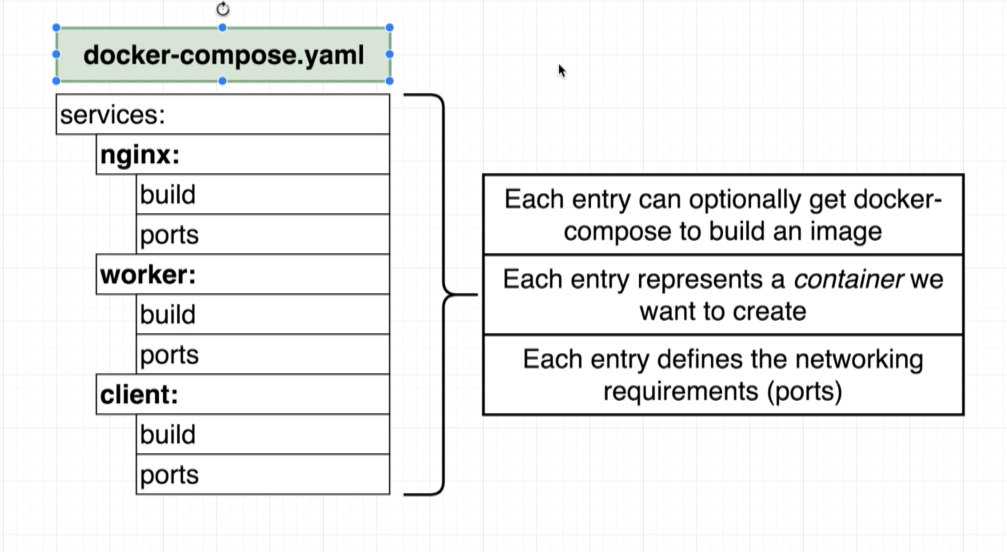

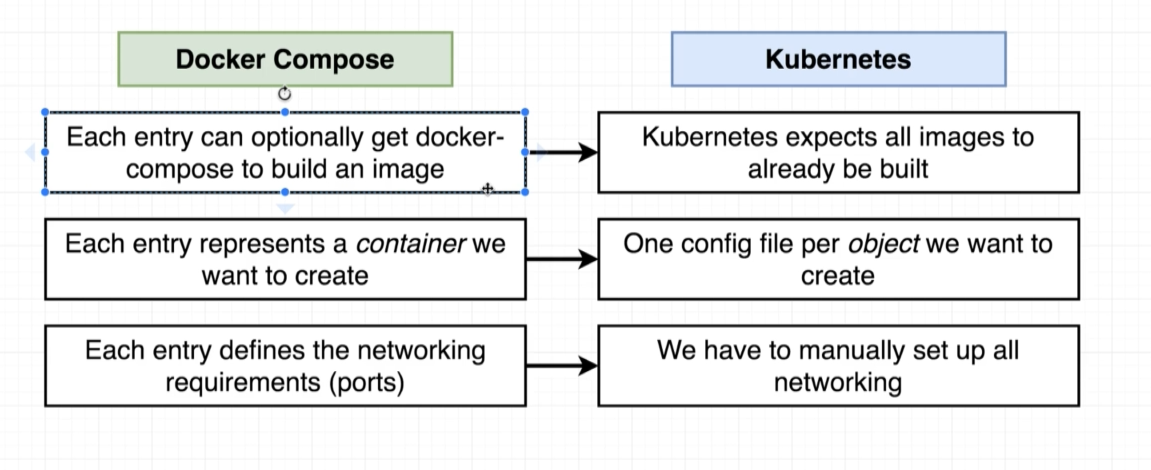

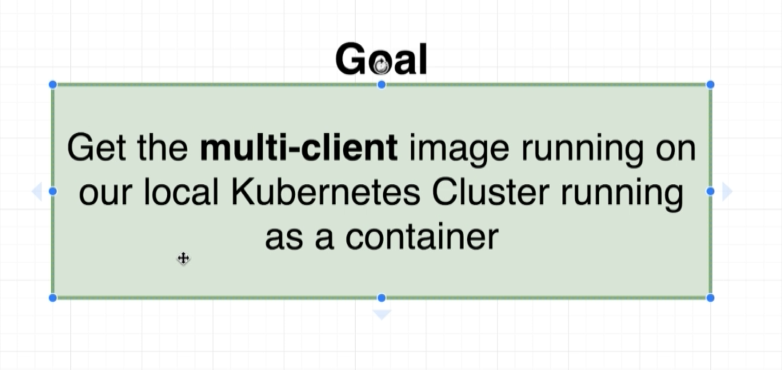

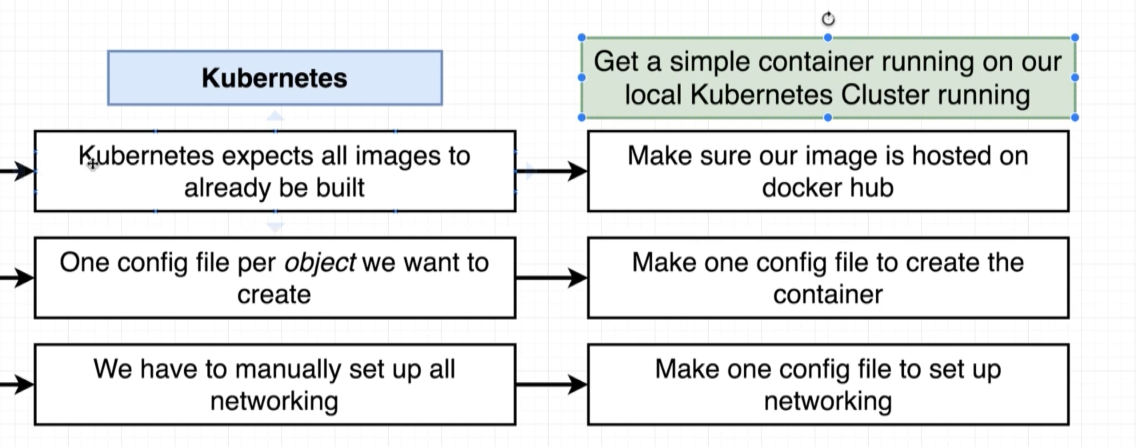

##### 1. create simplek8s in project level directory which will most prolly have app backend complex redis-image directories 

#### we create two configuration files, first one to create the container, the second one to set up networking between containers 

client-pod.yaml is for creating container<br>
client-node-port.yml is for networking between containers

apiVersion, kind are present in both files at the top<br>
one has Service and the other has Pod in its kind

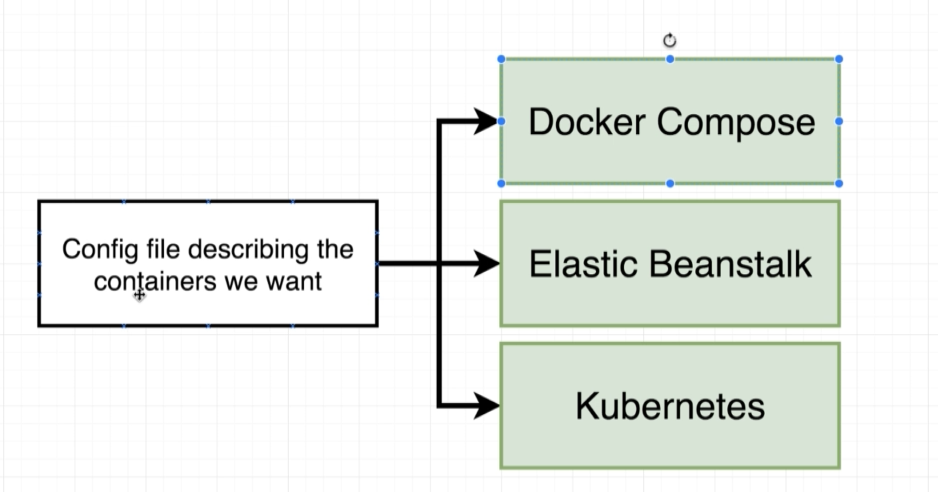

##### now we will feed both config files in kubernetes command line tool """kubectl"""

kubectl will create objects from both config files

objects are things present inside our kubernetes clusters

every objects are different and exists in kubernetes cluster

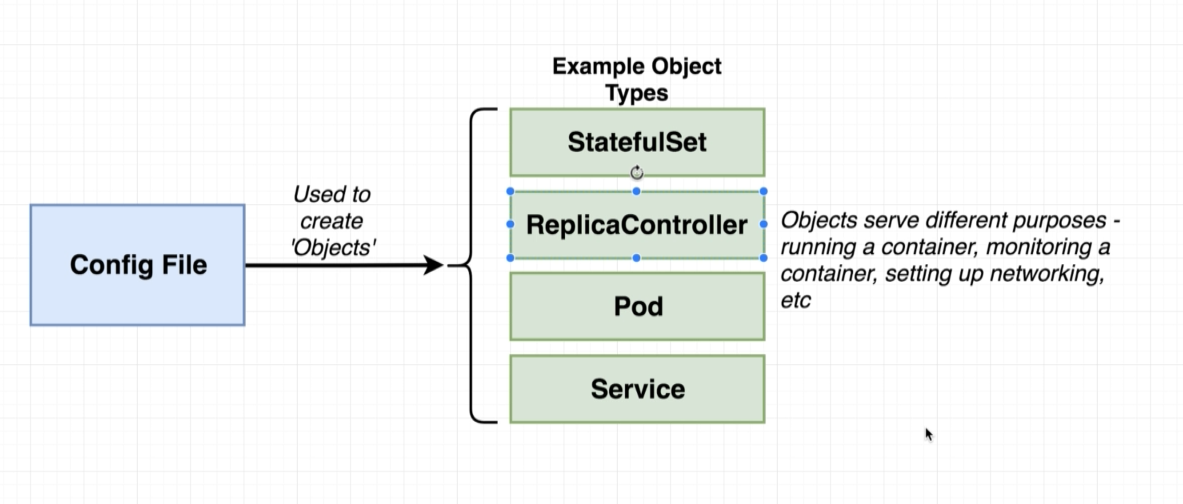

#### apiVersion let us create objects that the apiVersion allows 

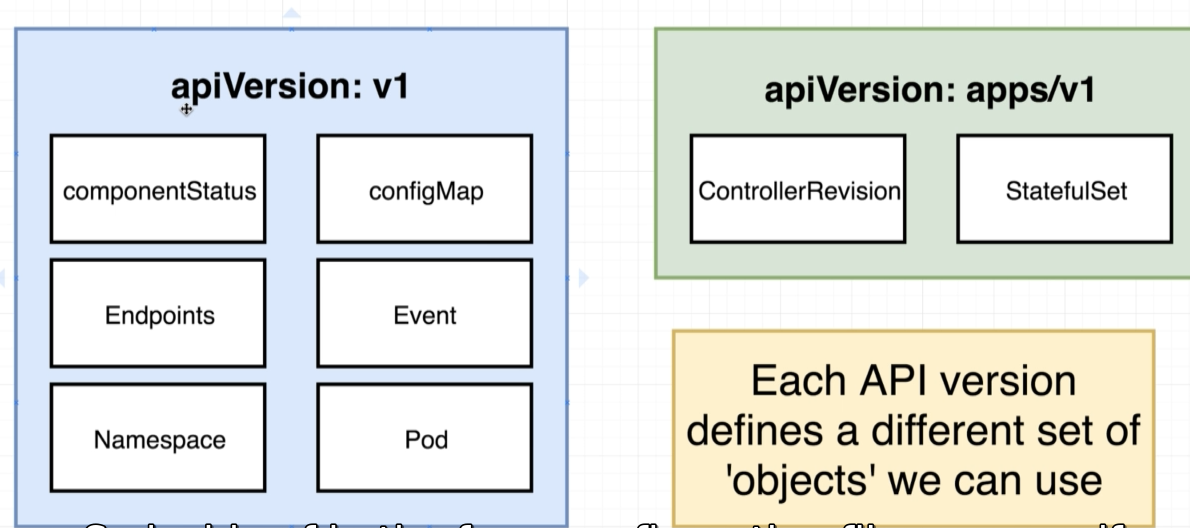

##### what is Pod ?????<br>
minikube start started a new VM, that is called node, that is used by k8s to run some number of different objects, some objects we will create are called Pods

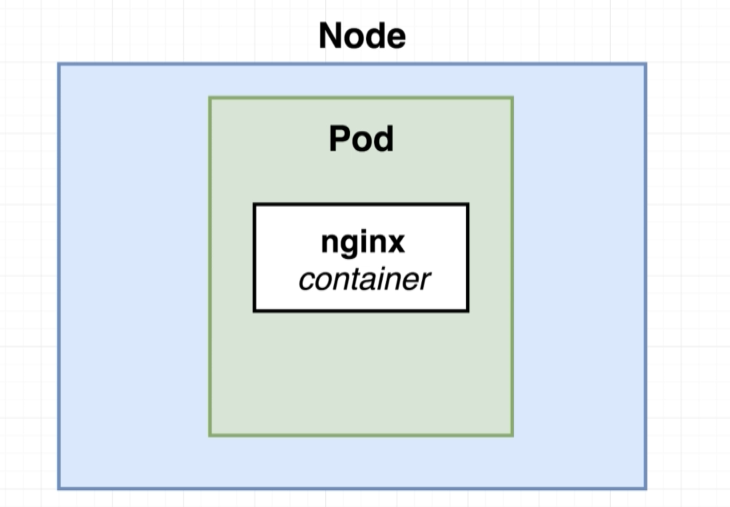

Pod is grouping of containers with a very common purpose<br>
In kubernetes we can't create one naked container by itself with no assopciated overhead.

pod needs on or more containers running inside of it like below

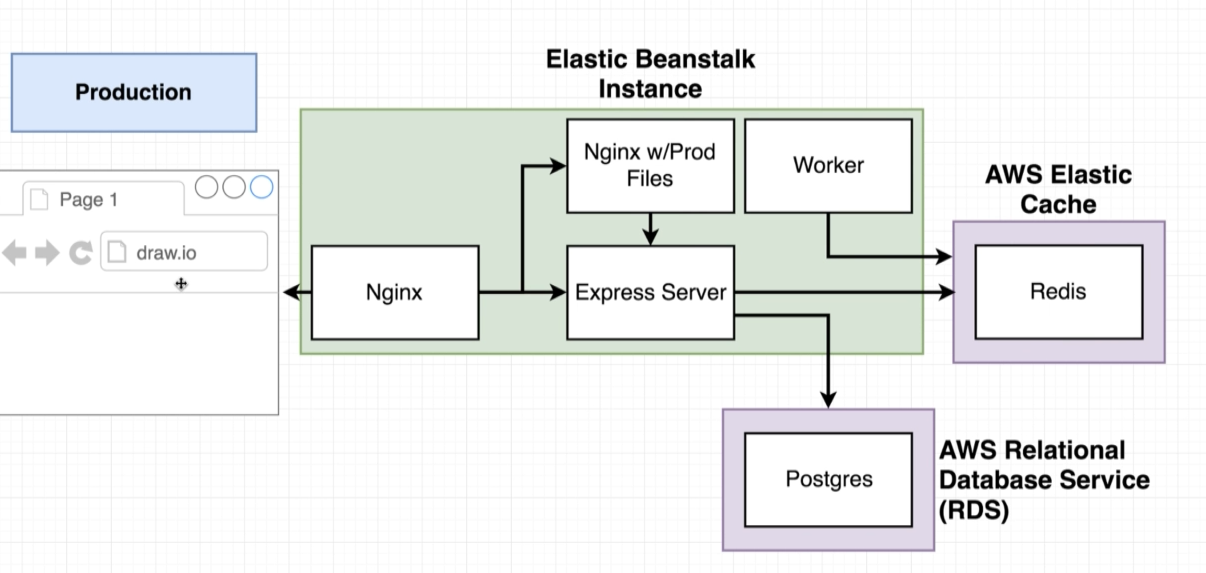

we can create 4 containers from 4 images in one single pod, option but not what Pod is meant to be

##### Pod is meant to have all the tight integrated containers, that if one got broke others don't work, like below

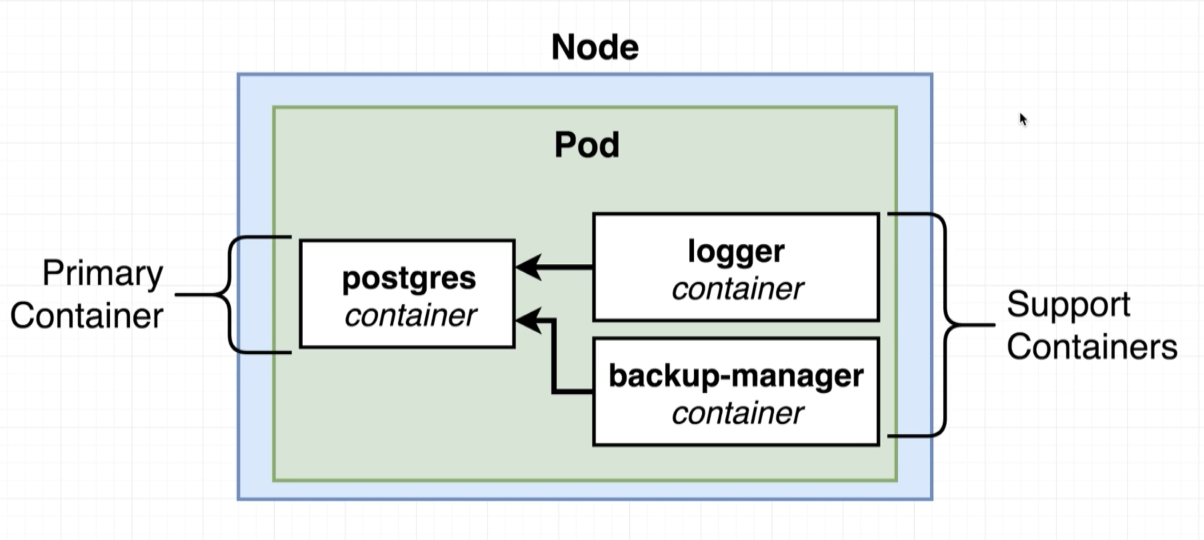

here if postgres is down, neither the logger, neither the backup-manager would work, in Pod the smallest thing we can deploy

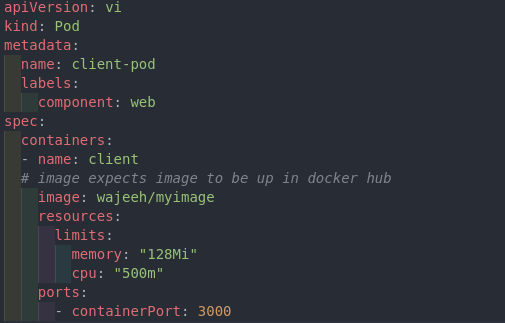

above code is makning Pod with one container inside of it, arbitrary name is client, the container can be accessed by other containers using the name<br>
**here we are exposing port 3000, because the image is running nginx server which listens to port 3000**

##### but the above won't connect it to another container, for connection we will use the client-node-port.yaml for to  

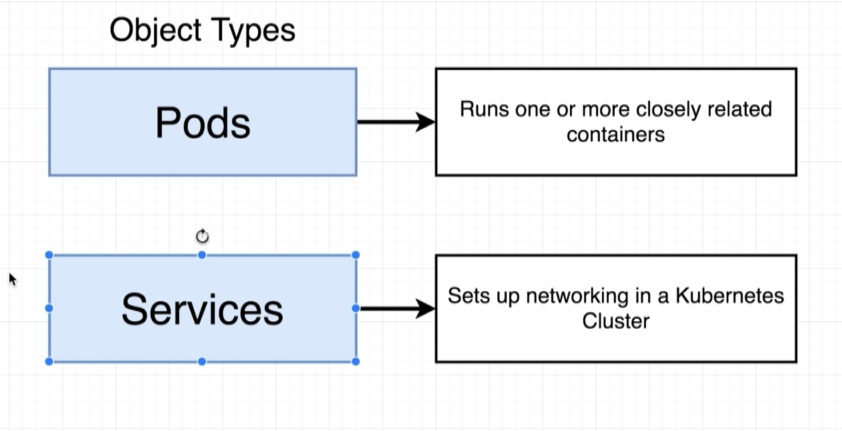

#### NOTWORKING IS THE MOST IMPORTANT SO MOSTLY WE WILL BE CONFIGURING SERVICES

### 4 subtypes of services 

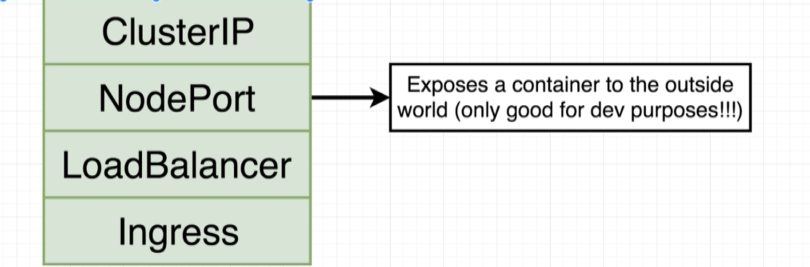

##### we are making a nodeport service 

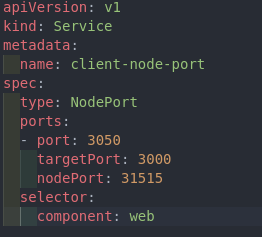

nodeport expose container outside the world, only good for development purposes<br>
Note: Nodeport not for productions use

Nodeport can be used to connect to browser in local computer

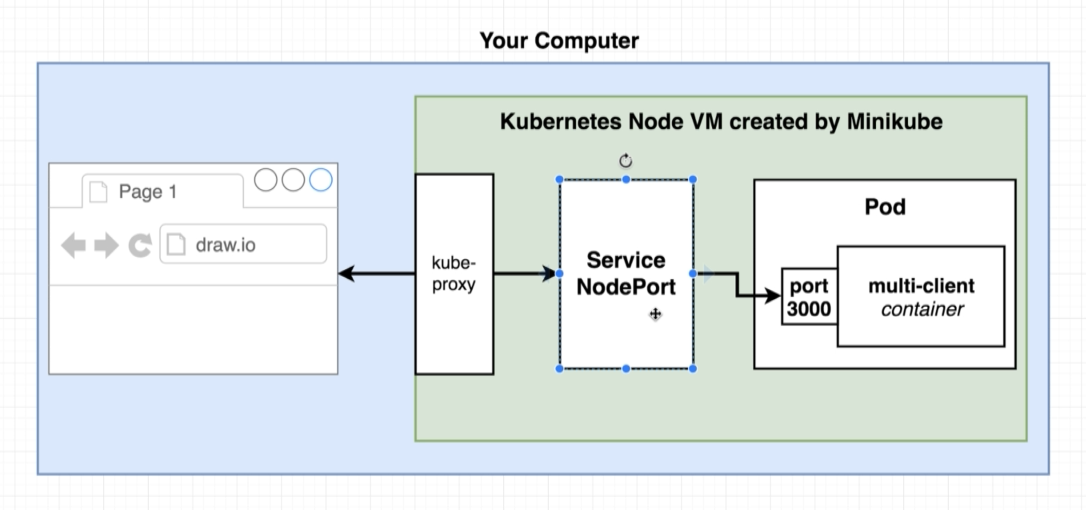

##### Kubeproxy
kubeproxy is one single window to the outside world for a kubernetes cluster<br>
Kubeproxy manages multiple ports(services) going outside of kubernetes container to the world

### detailed

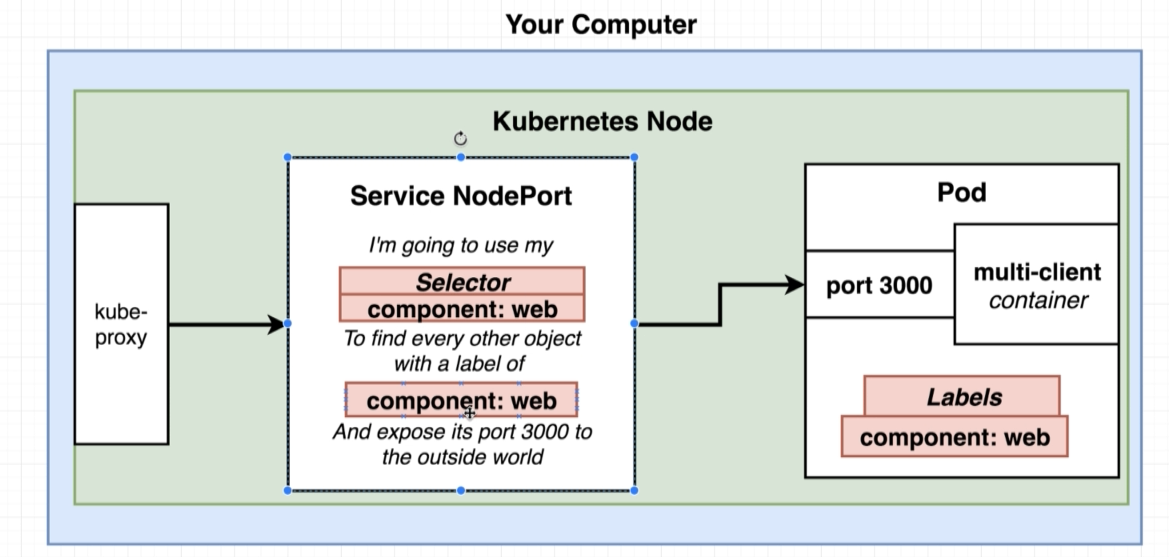

##### NOTE: we use label in selector property to connect different objects <br>
instead of label we can also use tier label<br>
config makes the kube-proxy look for the (port mentioned in config) to become available to the outside world

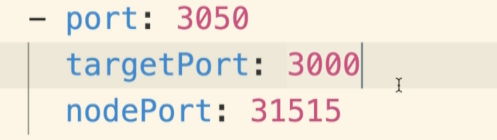

each port will have three different properties in config as defined above

port is that another Pod or another container inside our application could access in order to get access to multi-client Pod

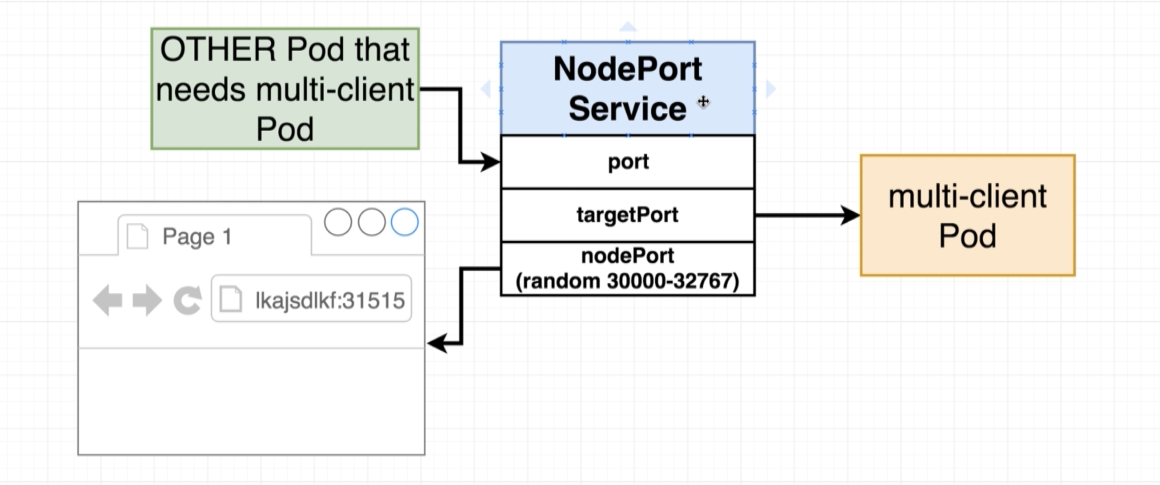

target port is port inside that Pod that we want to open port inside, 3000 is the port of the inside, which is mapped to multi-client container

##### NodePort is most useful whenever we use type Nodeport 

we use nodeport whenever we want to access multi client from browser

## NOW WE WILL RUN THE KUBERNETES CLUSTER 

##### we feed both files using Kubectl into cluster 

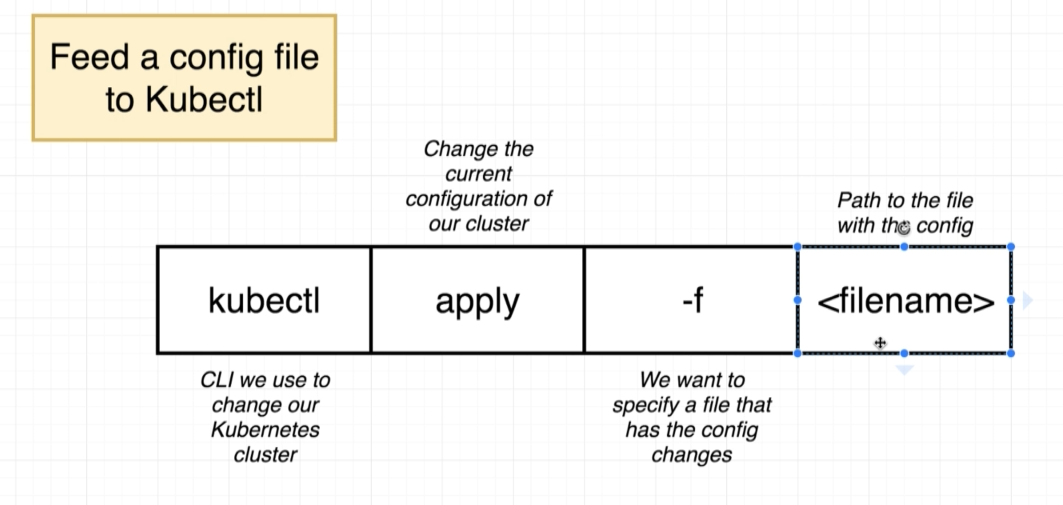

##### kubectl apply -f client-pod.yaml 

## TO GET STATUS ANY DIFFERENT OBJECT 

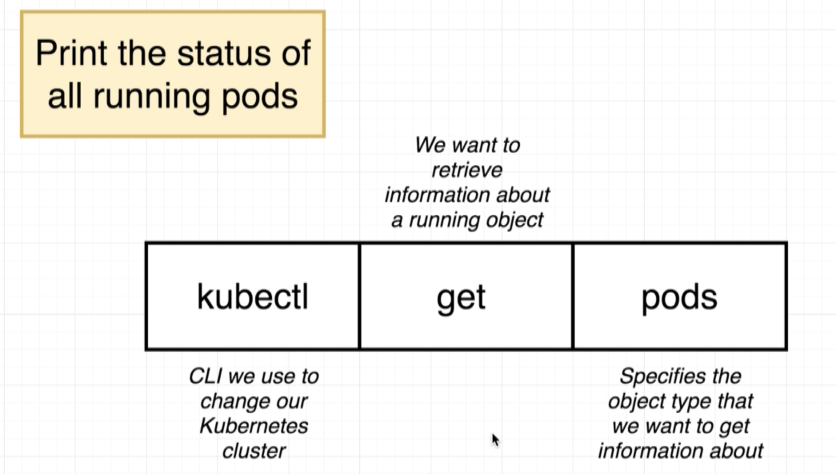

##### kubectl get pods
will give us all the information about pods

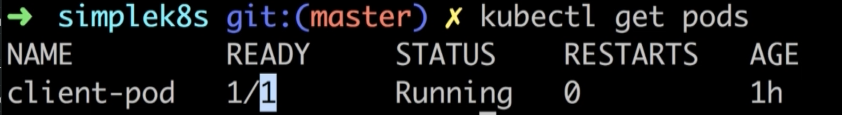

1/1 means 1 pod running and the second is number of copies

we might later want to copy the pod for scaling the application

Restart will restart the pod and increase the number

## To get all the services 

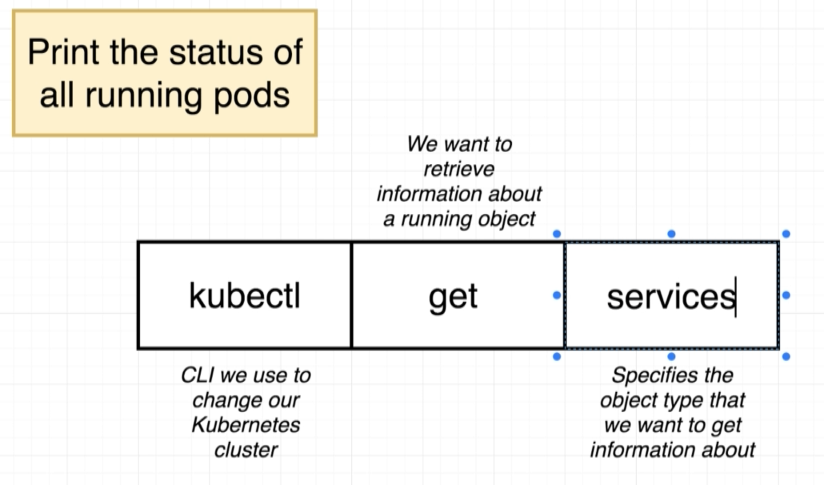

##### kubectl get services
will get the informations of all the services

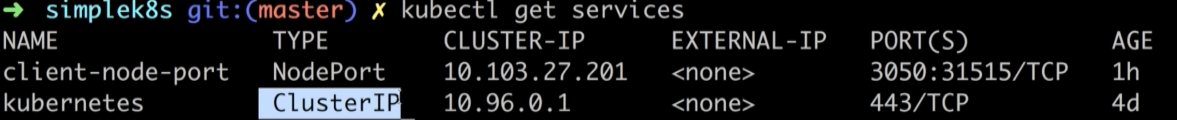

##### the info related to 'Kubernetes" is internal working and we can ignore it 

port is what other Pods will use to communicate, while the Nodeport is what we will use from local machine to communicate with the cluster, the information does not show us target port

##### To access the cluster, we will have to use machines IP adress instead of localhost 

##### minikube ip,,,,,,, will give us the IP adress of that cluster 

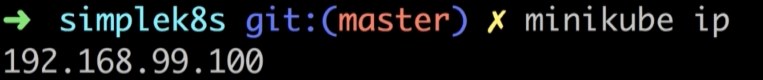

##### to access the server we will use 192.168.99.100:31515 to access the kubernetes cluster 

# NOW  

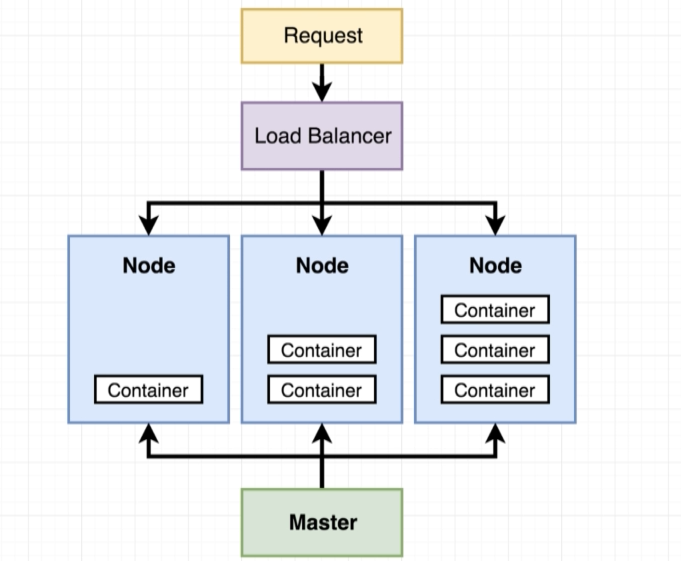

docker ps can list the container again

docker kill can kill the container as well

kubernetes will restart the container if we explicitely kill the container using docker command

# RUNNING MULTIPLE COPIES OF POD 

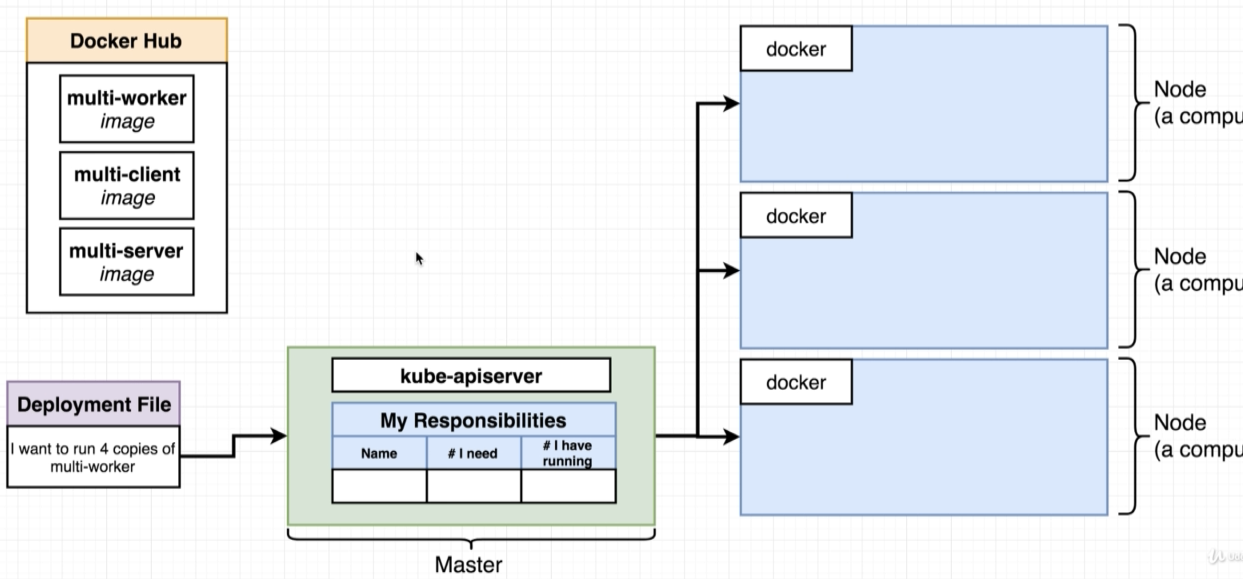

##### deployment file can create copies by passing instructions to master (kube-apiserver, one of other programs) 

as we issue command for copying pod, the kube-apiserver will get different Nodes to pull image from docker hub and run the copies

##### whenever any of the node goes down, the master (kube-apiserver) restarts the container  but before that it update its status or total running containers, master can choose any node to start the container

#### we passed the deployment file to master, we cant reach the nodes, we always reach kubectl 